# Missandei Deserved Better 

This notebook will analyze particular tags -- character, additional, relationship, or others -- and  trends in the actual fanfic texts centering Missandei of Naath. This is the computational essay to be paired along with "'“Missandei Deserved Better:” Fan Uptakes of Missandei of Naath," part of the Critical Fan Toolkit.  

The [Critical Fan Toolkit](http://www.criticalfantoolkit.org/) is a dissertation by [Cara Marta Messina](https://caramartamessina.com/). 

## Missandei As "Window Dressing"
When I asked WriteGirl about the lack of use of Missandei's character, she said that even when Missandei appears in a fic, she is often written as "window dressing" and merely there to affirm Dany's arguments.

To determine the accuracy of this, I will pull all the fanfics that use the Missandei character tag, see who the most used character tag is in that smaller corpus, and count how often the actual texts mention Missandei and other characters. In order to do this, I am using the "String contains" function because Missandei appears as "Missandei (ASOIF)," "Missandei," and in other ways. String contains allows to pull *all* mentions of Missandei.

There are 29897 fanfics in total, and only 1018 use Missandei in the character tag, or 3.4%.

In [1]:
#pandas for working with dataframes
import pandas as pd
import numpy as np

#visualizing
import seaborn as sns

#nltk libraries
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from nltk.stem.porter import *
import string

from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktLanguageVars 

#has the nice counter feature for counting tags
import collections
from collections import Counter 

In [2]:
got0 = pd.read_csv('data/got_data_original/got0.csv')
got1 = pd.read_csv('data/got_data_original/got1.csv')
got2 = pd.read_csv('data/got_data_original/got2.csv')
got3 = pd.read_csv('data/got_data_original/got3.csv')

got_all = pd.concat([got0, got1, got2, got3])

In [3]:
got_all[:2]

,Unnamed: 0,work_id,title,rating,category,fandom,relationship,character,additional tags,language,...,status,status date,words,chapters,comments,kudos,bookmarks,hits,body,month
0,0,19289563,game of thrones,Explicit,Multi,"game of thrones, A Song of Ice and Fire","Gendry Baratheon/Arya Stark, gendry baratheon/...","Arya Stark, Bella, Gendry Baratheon - Characte...",NaN,English,...,Updated,2019-06-20,853.0,2/?,NaN,17.0,2.0,820.0,authors note: this is really short but i promi...,2019-06
1,1,17179712,Game of Thrones,Teen And Up Audiences,F/M,"Game of Thrones (TV), A Song of Ice and Fire -...","Jon Snow/Daenerys Targaryen, Arya Stark/Gendry...","Jon Snow | Aegon Targaryen, Arya Stark, Sansa ...","Armies and Allies, War, Romance, Eventual Happ...",English,...,Updated,2019-03-03,24204.0,17/?,77.0,403.0,79.0,14888.0,Arya's chambers still felt different.\n\n \n\n...,2018-12


In [4]:
len(got_all.index)

29897

In [5]:
gotMiss = got_all[got_all['character'].str.contains("Missandei", na=False)]
len(gotMiss.index)

1018

In [164]:
def character_percentage(df, characterName):
    dfcount = len(df.index)
    df1 = df[df['character'].str.contains(characterName, na=False)]
    df1count = len(df1.index)
    percentage = (df1count * 100)/dfcount
    
    print(percentage)

In [172]:
character_percentage(got_all, 'Brienne')

16.760879017961667


In [166]:
character_percentage(got_all, 'Gendry')

12.272134327858982


In [170]:
character_percentage(got_all, 'Tormund')

5.000501722580861


In [171]:
character_percentage(got_all, 'Lyanna')

5.301535271097435


In [169]:
character_percentage(got_all, 'Podrick')

4.642606281566712


In [182]:
character_percentage(got_all, 'Gilly')

1.7526842158076061


### Top Characters and Relationships - Functions for Tag Analyzing

I created functions to pull tags from the dataframe and count the top tags. I wil use this function specifically on the Missandei corpus to see which are the most popular characters and relationships used in this corpus.

In [6]:
def column_to_string(df,columnName):
    '''
    this function takes all the information from a specific column, joins it to a string, and then tokenizes & cleans that string.
    input: the name of the dataframe and the column name
    output: the tokenized list of the text with all lower case, punctuation removed, and no stop words
    '''
    df[columnName] = df[columnName].replace(np.nan,'',regex=True) 
    string = ' '.join(df[columnName].tolist())
    return string

In [7]:
def TagsAnalyzer(df, columnName):
    '''
    Input: the dataframe, the column you want to analyze, and the number of most common tags/phrases
    Output: A tupple of the most common tags in a column
    
    Description: this separates tags by commas, counts the most frequent tags, and will show you the most common
    '''
     #replace empty values & make a list of all the words using the column_to_string function
    string = column_to_string(df, columnName)
    
    #the function to tokenize, or put each value as an element in a list
    class CommaPoint(PunktLanguageVars):
        sent_end_chars = (',') 
    tokenizer = PunktSentenceTokenizer(lang_vars = CommaPoint())
    
    #tokenizing the list of strings based on the COMMA, not the white space (as seen in the CommaPoint above)
    ListOfTags = tokenizer.tokenize(string)
        
    #the "Counter" function is from the collections library
    allCounter=collections.Counter(ListOfTags)

    #returning a dictionary in which the keys are all the tags, and the items are the counts
    return allCounter.most_common()

#### Character Tags
Missandei is, of course, the most popular tag, which makes sense. Then it's Dany, Tyrion, Sansa, Arya, then Grey Worm. I'm unsurprised, yet still disappointed to see Grey Worm so far down.

Because Dany appears in second, this may support Ebony Elizabeth Thomas's observation that Missandei is often only depicted as Dany's friend and confidant, not her own person.

After I created the list of tupples ("MissCharacters), I also wanted to visualize the results. I put the list of tupples into a dataframe, as Seaborn (the graphing library) works best with dataframes. Then I visualized the top 5 characters used.

In [8]:
MissCharacters = TagsAnalyzer(gotMiss,'character')
MissCharacters[:100]

C:\Users\caram\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


[('Missandei (ASoIaF),', 744),
 ('Daenerys Targaryen,', 682),
 ('Tyrion Lannister,', 533),
 ('Sansa Stark,', 518),
 ('Arya Stark,', 473),
 ('Grey Worm,', 396),
 ('Jon Snow,', 369),
 ('Bran Stark,', 316),
 ('Jaime Lannister,', 286),
 ('Davos Seaworth,', 284),
 ('Brienne of Tarth,', 271),
 ('Jorah Mormont,', 266),
 ('Cersei Lannister,', 260),
 ('Gendry Waters,', 250),
 ('Samwell Tarly,', 234),
 ('Theon Greyjoy,', 224),
 ('Tormund Giantsbane,', 208),
 ('Varys (ASoIaF),', 196),
 ('Robb Stark,', 190),
 ('Sandor Clegane,', 180),
 ('Margaery Tyrell,', 176),
 ('Podrick Payne,', 139),
 ('Yara Greyjoy,', 137),
 ('Ned Stark,', 125),
 ('Daario Naharis,', 118),
 ('Ghost (ASoIaF),', 112),
 ('Melisandre of Asshai,', 112),
 ('Catelyn Tully Stark,', 101),
 ('Rickon Stark,', 98),
 ('Gilly (ASoIaF),', 93),
 ('Olenna Tyrell,', 93),
 ('Petyr Baelish,', 92),
 ('Drogon (ASoIaF),', 84),
 ('Lyanna Mormont,', 82),
 ('Barristan Selmy,', 80),
 ('Bronn (ASoIaF),', 79),
 ('Meera Reed,', 77),
 ('Euron Greyjoy,', 73)

In [79]:
MissCharactersDF = pd.DataFrame(MissCharacters, columns=["Character", "Count"])
MissCharactersDFtop5 = MissCharactersDF[:5]
MissCharactersDFtop5

,Character,Count
0,"Missandei (ASoIaF),",744
1,"Daenerys Targaryen,",682
2,"Tyrion Lannister,",533
3,"Sansa Stark,",518
4,"Arya Stark,",473


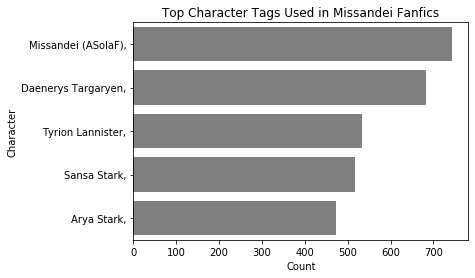

In [152]:
MissCharaViz = sns.barplot(x="Count", y="Character", data=MissCharactersDFtop5, color="gray").set_title("Top Character Tags Used in Missandei Fanfics")
MissCharaViz.figure.savefig("./images/MissCharacterTags.png", bbox_inches="tight")

#### Relationship Tags

The top relationship is Arya/Gendry, with Grey Worm/Missandei coming in next. In the top 20 relationships, Missandei only appears once and is paired with Grey Worm. 

In [9]:
MissRelations = TagsAnalyzer(gotMiss,'relationship')
MissRelations[:20]

C:\Users\caram\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


[('Arya Stark/Gendry Waters,', 113),
 ('Grey Worm/Missandei,', 76),
 ('Jaime Lannister/Brienne of Tarth,', 62),
 ('Jon Snow/Daenerys Targaryen,', 44),
 ('Catelyn Stark/Ned Stark,', 35),
 ('Gilly (ASoIaF)/Samwell Tarly,', 29),
 ('Jon Snow/Ygritte,', 28),
 ('Minor or Background Relationship(s),', 26),
 ('Cersei Lannister/Jaime Lannister,', 24),
 ('Khal Drogo/Daenerys Targaryen,', 24),
 ('Sandor Clegane/Sansa Stark,', 23),
 ('Tormund Giantsbane/Brienne of Tarth,', 23),
 ('Robb Stark/Margaery Tyrell,', 22),
 ('Talisa Maegyr/Robb Stark,', 21),
 ('Tyrion Lannister/Sansa Stark,', 18),
 ('Meera Reed/Bran Stark,', 18),
 ('Lyanna Stark/Rhaegar Targaryen,', 16),
 ('Renly Baratheon/Loras Tyrell,', 16),
 ('Sansa Stark/Margaery Tyrell,', 16),
 ('Jon Snow & Sansa Stark,', 15)]

### The Fanfic Texts

Of course, looking at metadata does not provide the entire picture. How often does Missandei actually appear in the fanfics that use her in the character tags? How does that compare to other characters? What types of words are used to describe Missandei and other characters? 

To analyze this, I will begin with simple word frequency counts of the whole Missandei corpus with specific names.

First, I will grab all the fanfic texts and put it into a string using the column_to_string function. Then, I will calculate how many words actually appear in the entire body of these fanfics using the len function. This will help to provide a ratio as I calculate how often particular names are used. 

Number of words that appear in the Missandei fanfic corpus: 194,504,308

In [10]:
MissText = column_to_string(gotMiss,"body")
MissText[:1000]

C:\Users\caram\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


"Arya's chambers still felt different.\n\n \n\nEven though two whole lunar cycles had passed since her return to Winterfell, returning to her bed each night to rest still felt strange.\n\n \n\nNot because she wasn't content to be home. Every day, Arya was re-discovering little bits of Winterfell she had forgotten these past five years, and, to her surprise, they had started to refill a hollowness she had not realised was there. It was only when she closed the door to her room that a haunting quiet settled over her. Arya could still feel the previous tenant of her chambers, lingering like a ghost. She hadn't asked anyone who had taken it during the Bolton's occupation of Winterfell. She had a suspicion she wouldn't like the answer.\n\n \n\nArya supposed it would take time to feel normal again, but she wished it would hurry up because she was starting to lose sleep.\n\n \n\nIndeed, she appeared to be the only resident of Winterfell awake at this hour. She waved a gloved hand in front of 

In [11]:
length = len(MissText)
length

194504308

In [12]:
df = ["Name", "Frequency"]
df

['Name', 'Frequency']

In [13]:
def WordPercentage(word, string):
    '''
    Description: This function finds the percentage for how often a word appears in a string. It's really just a simple word search function
    Input: Input a string and a word that you would like to calculate how often it appears in that string.
    Output: A percentage for how often that word appears in the string.
    '''
    #first, find the length of the string, or how many words appear, using the len() function
    length = len(string)
    
    #using the count() function, an NLTK function, count how often the word appears
    count = string.count(word)
    
    #calculate the percentage
    percent = (count * 100)/length
    
    return(percent)

In [15]:
print(WordPercentage("Missandei",MissText) + WordPercentage("Missy",MissText))

0.01741658081938216


In [129]:
WordPercentage("Arya",MissText)

0.033672261901777516

In [131]:
print(WordPercentage("Dany",MissText) + WordPercentage("Daenerys",MissText))

0.08329070017307791


In [60]:
WordPercentage("Sansa",MissText)

0.051355160729910414


In [59]:
WordPercentage("Tyrion",MissText)

0.028398342724624895


In [106]:
WordPercentage("Grey",MissText)

0.011530850000504873


In [107]:
WordPercentage("Westeros",MissText)

0.005049245490233564


In [108]:
WordPercentage("Naath",MissText)

0.0005388055466617222


#### Visualizing

In [16]:
print((MissText.count("Missandei")) + MissText.count("Missy"))
print((MissText.count("Daenerys")) + MissText.count("Dany"))
print(MissText.count("Arya"))
print(MissText.count("Sansa"))
print(MissText.count("Grey"))

33876
162004
65494
99888
22428


In [17]:
useData = {'Character': ["Missandei", "Dany", "Arya", "Sansa", "Grey Worm","Tyrion"], 'Frequency': [0.01741658081938216, 0.08329070017307791, 0.033672261901777516, 0.051355160729910414, 0.011530850000504873, 0.028398342724624895]}
dfUseData = pd.DataFrame.from_dict(useData).sort_values("Frequency", ascending=False)
dfUseData

,Character,Frequency
1,Dany,0.083291
3,Sansa,0.051355
2,Arya,0.033672
5,Tyrion,0.028398
0,Missandei,0.017417
4,Grey Worm,0.011531


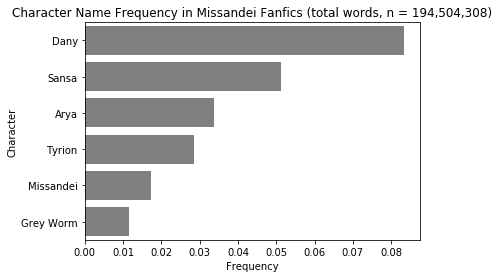

In [18]:
MissCharaUse = sns.barplot(x="Frequency", y="Character", data=dfUseData, color="gray").set_title("Character Name Frequency in Missandei Fanfics (total words, n = 194,504,308)")
MissCharaUse.figure.savefig("./images/MissCharacterFrequency.png", bbox_inches="tight")